In [3]:
# look at the performance from openai's impl
!ls ~/logs/ppo/pendulum

0.0.monitor.csv  log.txt  progress.csv


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

logfile = '/home/ubuntu/tmp/logs/ppo/pendulum/progress.csv'

prog =pd.read_csv(logfile)

prog

,FPS,MAEpLen,MAEpRet,MeanStepRew,PolicyNetAvgW,Q,VQDiff,ValueNetAvgW,cliprange,explained_variance,iteration/nupdates,loss,vpreds
0,1298,NaN,NaN,0.186397,-0.003398,2.571273,11.451416,-0.006175,0.2000,-0.039369,1/1000,-3711.336400,-0.053818
1,3422,0.0,0.218940,0.198319,-0.003367,2.490717,9.742668,-0.006215,0.1991,-0.039091,10/1000,0.439564,0.003048
2,3831,0.0,0.130182,0.157484,-0.003353,2.419477,11.703811,-0.006263,0.1981,0.009579,20/1000,0.783706,0.000235
3,3839,0.0,0.147106,0.135098,-0.003358,2.708792,12.869786,-0.006298,0.1971,-0.032356,30/1000,0.173634,-0.012637
4,3825,0.0,0.190352,0.196787,-0.003304,2.977839,15.236349,-0.006323,0.1961,-0.044222,40/1000,-1.248009,-0.003968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3306,0.0,-0.106560,-0.106564,-0.007813,-1.589686,0.699821,-0.006701,0.1041,-0.001771,960/1000,-0.420512,-1.638975
97,3418,0.0,-0.106118,-0.106114,-0.007838,-1.576936,0.697570,-0.006698,0.1031,-0.001560,970/1000,-0.376253,-1.611195
98,3879,0.0,-0.104571,-0.104529,-0.007875,-1.553660,0.674719,-0.006692,0.1021,-0.001808,980/1000,-0.341164,-1.586855
99,3858,0.0,-0.101358,-0.101213,-0.007932,-1.498657,0.628571,-0.006681,0.1011,-0.003329,990/1000,-0.368169,-1.558356


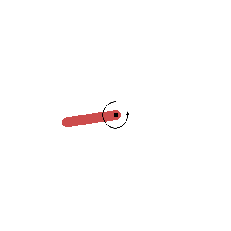

total reward:  [-6560.5098726]
avg reward:  [-6.56050987]


<Figure size 432x288 with 0 Axes>

In [13]:
from rlkits.policies import PolicyWithValue
from rlkits.env_batch import SingleEnvBatch
from rlkits.utils import inspect_agent

import torch

import gym

def make_env():
    return gym.make('Pendulum-v0')

env = SingleEnvBatch(make_env())

ob_space = env.observation_space
ac_space = env.action_space

pi = PolicyWithValue(ob_space=ob_space,
    ac_space=ac_space, ckpt_dir='/tmp',
    hidden_layers=[64,64],
    activation=torch.nn.Tanh)


ckpt_dir = '/home/ubuntu/tmp/models/ppo/pendulum'

pi.load_ckpt(ckpt_dir)

inspect_agent(env, pi)

In [8]:
help(inspect_agent)

Help on function inspect_agent in module rlkits.utils.utils:

inspect_agent(env, agent, nsteps=1000)
    Look at how the agent behaves in the 
    env for nsteps time steps

